In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#How to parse and read the file
def parse_g1_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    #Find the start of the second data chunk (G1 data)
    g1_start=None
    for i, line in enumerate(lines):
        if 'G1,stat +,stat -,sys +,sys -' in line:
            g1_start=i+1
            break
    
    if g1_start is None:
        raise ValueError("Could not find G1 data section")
    
    # Extract G1 data lines (skip empty lines and comments)
    g1_data=[]
    for i in range(g1_start, len(lines)):
        line=lines[i].strip()
        if line and not line.startswith('#'):
            g1_data.append(line)
    
    # Parse the data into a structured format
    parsed_data=[]
    for line in g1_data:
        parts=line.split(',')
        if len(parts)>=9:  # Ensure we have all columns
            row = {
                'X': float(parts[0]),
                'X_LOW': float(parts[1]),
                'X_HIGH': float(parts[2]),
                'Q2': float(parts[3]),
                'G1': float(parts[4]),
                'stat_plus': float(parts[5]),
                'stat_minus': float(parts[6]),
                'sys_plus': float(parts[7]),
                'sys_minus': float(parts[8])
            }
            parsed_data.append(row)
    
    return pd.DataFrame(parsed_data)

In [ ]:
#Load and proscess data
filename=r'C:\Users\castl\Desktop\Internship stuff\Data_Lionel\Data_Lionel\E142_data\HEPData-ins424108-v1-csv\Table1.csv'
df=parse_g1_data(filename)

In [ ]:
#Calculate x as average of X_LOW and X_HIGH
df['x_avg']=(df['X_LOW']+df['X_HIGH'])/2

In [ ]:
#Use only statistical uncertainties (take absolute values since errorbar expects positive values)
df['error_plus']=abs(df['stat_plus'])
df['error_minus']=abs(df['stat_minus'])

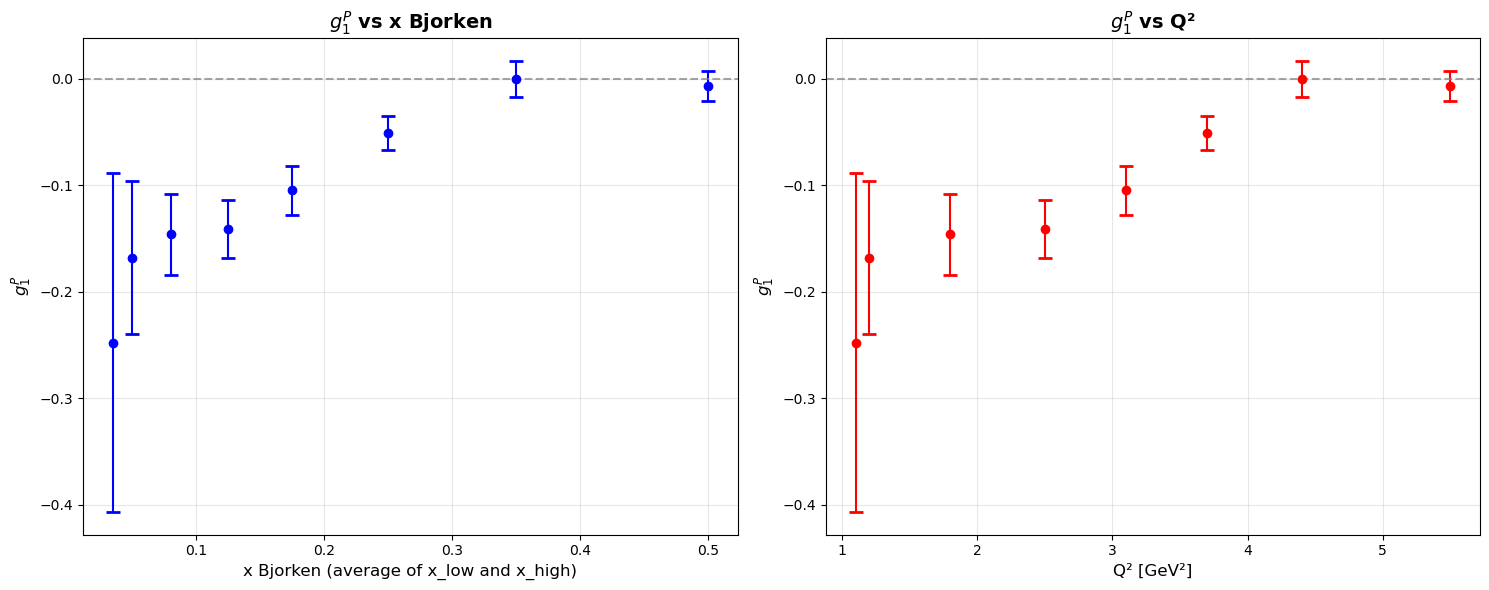

G1 Data Summary (with averaged x values and statistical errors only):
       X  x_avg  X_LOW  X_HIGH   Q2     G1  error_plus  error_minus
0  0.035  0.035   0.03    0.04  1.1 -0.248       0.159        0.159
1  0.050  0.050   0.04    0.06  1.2 -0.168       0.072        0.072
2  0.082  0.080   0.06    0.10  1.8 -0.146       0.038        0.038
3  0.124  0.125   0.10    0.15  2.5 -0.141       0.027        0.027
4  0.175  0.175   0.15    0.20  3.1 -0.105       0.023        0.023
5  0.246  0.250   0.20    0.30  3.7 -0.051       0.016        0.016
6  0.343  0.350   0.30    0.40  4.4  0.000       0.017        0.017
7  0.466  0.500   0.40    0.60  5.5 -0.007       0.014        0.014

Data points: 8
Original X range: 0.035 to 0.466
Averaged x range: 0.035 to 0.500
Q² range: 1.1 to 5.5 GeV²
G1 range: -0.248 to 0.000

Note: Error bars show statistical uncertainties only


In [8]:
#Plot and Stats
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(15, 6))

#Plot 1: G1 vs X (using averaged x values)
ax1.errorbar(df['x_avg'], df['G1'], 
            yerr=[df['error_minus'], df['error_plus']], 
            fmt='bo', capsize=5, capthick=2, markersize=6)
ax1.set_xlabel('x Bjorken (average of x_low and x_high)', fontsize=12)
ax1.set_ylabel('$g_1^P$', fontsize=12)
ax1.set_title('$g_1^P$ vs x Bjorken', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add horizontal line at y=0 for reference
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.7)

# Plot 2: G1 vs Q²
ax2.errorbar(df['Q2'], df['G1'], 
            yerr=[df['error_minus'], df['error_plus']], 
            fmt='ro', capsize=5, capthick=2, markersize=6)
ax2.set_xlabel('Q² [GeV²]', fontsize=12)
ax2.set_ylabel('$g_1^P$', fontsize=12)
ax2.set_title('$g_1^P$ vs Q²', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add horizontal line at y=0 for reference
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print the data for verification
print("G1 Data Summary (with averaged x values and statistical errors only):")
print("=" * 70)
print(df[['X', 'x_avg', 'X_LOW', 'X_HIGH', 'Q2', 'G1', 'error_plus', 'error_minus']])

# Additional statistics
print(f"\nData points: {len(df)}")
print(f"Original X range: {df['X'].min():.3f} to {df['X'].max():.3f}")
print(f"Averaged x range: {df['x_avg'].min():.3f} to {df['x_avg'].max():.3f}")
print(f"Q² range: {df['Q2'].min():.1f} to {df['Q2'].max():.1f} GeV²")
print(f"G1 range: {df['G1'].min():.3f} to {df['G1'].max():.3f}")
print(f"\nNote: Error bars show statistical uncertainties only")